<a href="https://colab.research.google.com/github/KrishnaTSasi/FUTURE_DS_03/blob/main/DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

College Event Feedback Analysis project

In [ ]:
# 1. Install dependencies
!pip install textblob vaderSentiment seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
# 2. Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# 3. Load CSV file
df = pd.read_csv("/content/drive/MyDrive/student_feedback.csv")
df

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9
...,...,...,...,...,...,...,...,...,...,...
996,996,55,8,7,6,2,5,7,7,9
997,997,913,5,5,6,5,6,7,6,1
998,998,199,9,5,8,3,8,1,1,2
999,999,539,10,2,7,4,3,4,10,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

In [ ]:
df.shape

(1001, 10)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Student ID,0
Well versed with the subject,0
Explains concepts in an understandable way,0
Use of presentations,0
Degree of difficulty of assignments,0
Solves doubts willingly,0
Structuring of the course,0
Provides support for students going above and beyond,0
Course recommendation based on relevance,0


In [ ]:
df.describe()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
# Drop unnecessary column
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

In [ ]:
# Convert all feedback columns to numeric (ignoring Student ID)
feedback_cols = [col for col in df.columns if col != 'Student ID']
df[feedback_cols] = df[feedback_cols].apply(pd.to_numeric, errors='coerce')

/tmp/ipython-input-1216463063.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary['mean'], y=summary.index, palette='viridis')


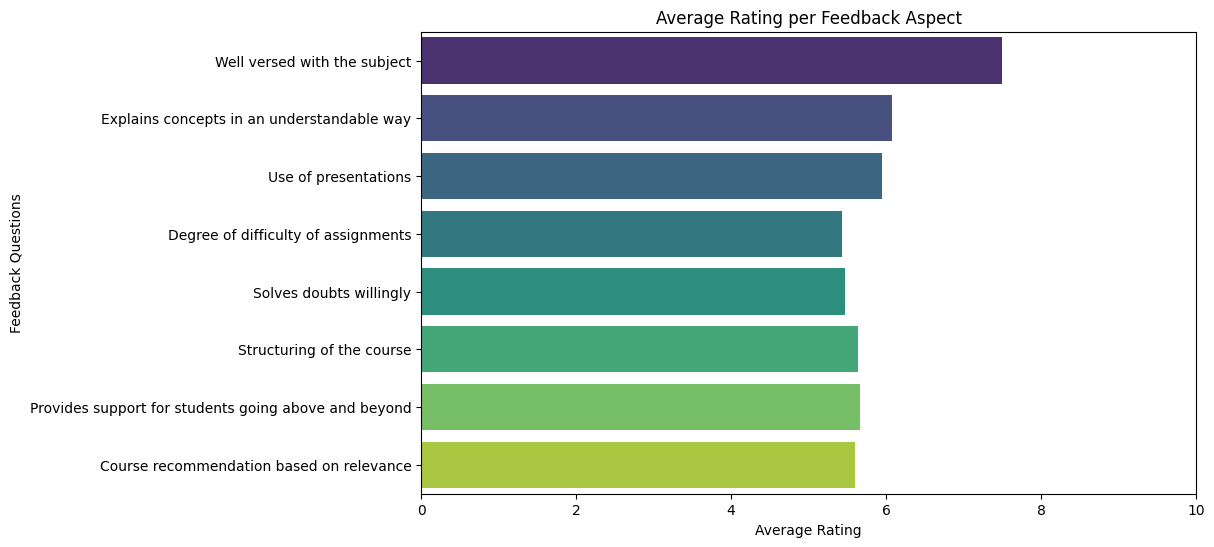

In [ ]:
# Bar plot of average scores
summary = df[feedback_cols].describe().T # Calculate descriptive statistics
plt.figure(figsize=(10,6))
sns.barplot(x=summary['mean'], y=summary.index, palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Feedback Questions')
plt.title('Average Rating per Feedback Aspect')
plt.xlim(0,10)
plt.show()

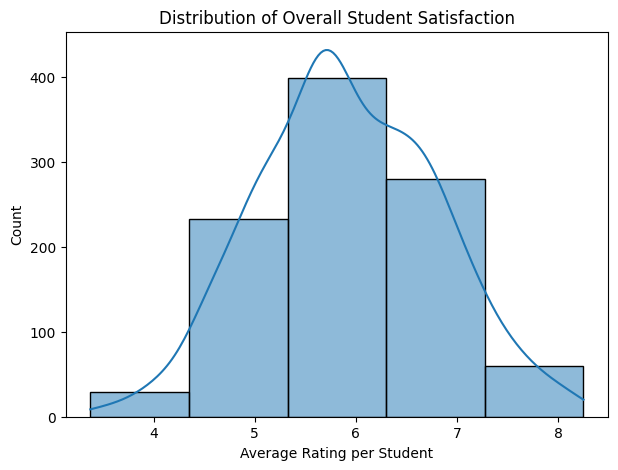


Overall Average Satisfaction: 5.9154595404595405


In [ ]:
# Overall Satisfaction Score
df["Overall_Satisfaction"] = df[rating_cols].mean(axis=1)

plt.figure(figsize=(7,5))
sns.histplot(df["Overall_Satisfaction"], bins=5, kde=True)
plt.title("Distribution of Overall Student Satisfaction")
plt.xlabel("Average Rating per Student")
plt.show()

print("\nOverall Average Satisfaction:", df["Overall_Satisfaction"].mean())

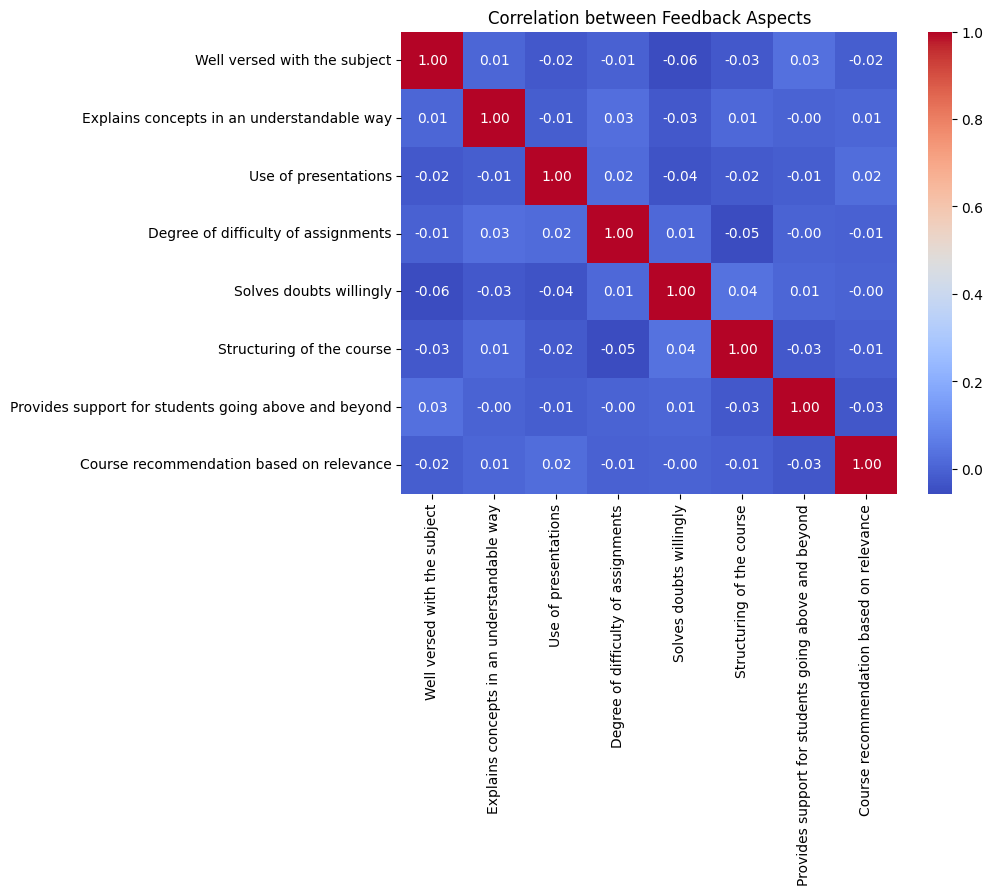

In [ ]:
# Heatmap of correlations
plt.figure(figsize=(8,6))
sns.heatmap(df[feedback_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Feedback Aspects')
plt.show()

In [ ]:
# Identify strong and weak areas
strong_areas = summary[summary['mean'] >= 4.5]
weak_areas = summary[summary['mean'] <= 3.5]

print("\nStrong Areas (Avg >= 4.5):")
print(strong_areas)

print("\nAreas for Improvement (Avg <= 3.5):")
print(weak_areas)


Strong Areas (Avg >= 4.5):
                                                     count      mean  \
Well versed with the subject                        1001.0  7.497502   
Explains concepts in an understandable way          1001.0  6.081918   
Use of presentations                                1001.0  5.942058   
Degree of difficulty of assignments                 1001.0  5.430569   
Solves doubts willingly                             1001.0  5.474525   
Structuring of the course                           1001.0  5.636364   
Provides support for students going above and b...  1001.0  5.662338   
Course recommendation based on relevance            1001.0  5.598402   

                                                         std  min  25%  50%  \
Well versed with the subject                        1.692998  5.0  6.0  8.0   
Explains concepts in an understandable way          2.597168  2.0  4.0  6.0   
Use of presentations                                1.415853  4.0  5.0  6.0   
Degree 